In [71]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.metrics import median_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
import re
from scipy.sparse import hstack
from sklearn.metrics import mean_absolute_error
# Data Study
#df=pd.read_table('D:\workshop\ML\kaggle\\Mercari\\train.tsv','\t', nrows=9999)
df = pd.read_csv('D:\workshop\ML\kaggle\Mercari\minitrain.csv')
df

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35,1,target New with tags. Leather horses. Retail f...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59,0,"Banana republic bottoms, Candies skirt with ma..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19,0,Girls Size small Plus green. Three shorts total.
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8,0,I realized his pants are on backwards after th...


In [72]:
#finding if null
print(df.apply(lambda x: sum(x.isnull()), axis=0))

train_id               0
name                   0
item_condition_id      0
category_name         12
brand_name           888
price                  0
shipping               0
item_description       0
dtype: int64


In [73]:
def split_cat(text):
    try: return text.split("/")
    except: return ("No Label", "No Label", "No Label")
df['general_cat'], df['sub_cat1'], df['sub_cat2']= zip(*df['category_name'].apply(lambda x: split_cat(x)))

df=df.drop('category_name', axis=1)
df.brand_name=df.brand_name.fillna('no brand')
df.item_description=df.item_description.fillna('No description yet')
df

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,general_cat,sub_cat1,sub_cat2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,no brand,10,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,52,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Target,10,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,no brand,35,1,target New with tags. Leather horses. Retail f...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,no brand,44,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
5,5,Bundled items requested for Ruie,3,no brand,59,0,"Banana republic bottoms, Candies skirt with ma...",Women,Other,Other
6,6,Acacia pacific tides santorini top,3,Acacia Swimwear,64,0,Size small but straps slightly shortened to fi...,Women,Swimwear,Two-Piece
7,7,Girls cheer and tumbling bundle of 7,3,Soffe,6,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Apparel,Girls
8,8,Girls Nike Pro shorts,3,Nike,19,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Apparel,Girls
9,9,Porcelain clown doll checker pants VTG,3,no brand,8,0,I realized his pants are on backwards after th...,Vintage & Collectibles,Collectibles,Doll


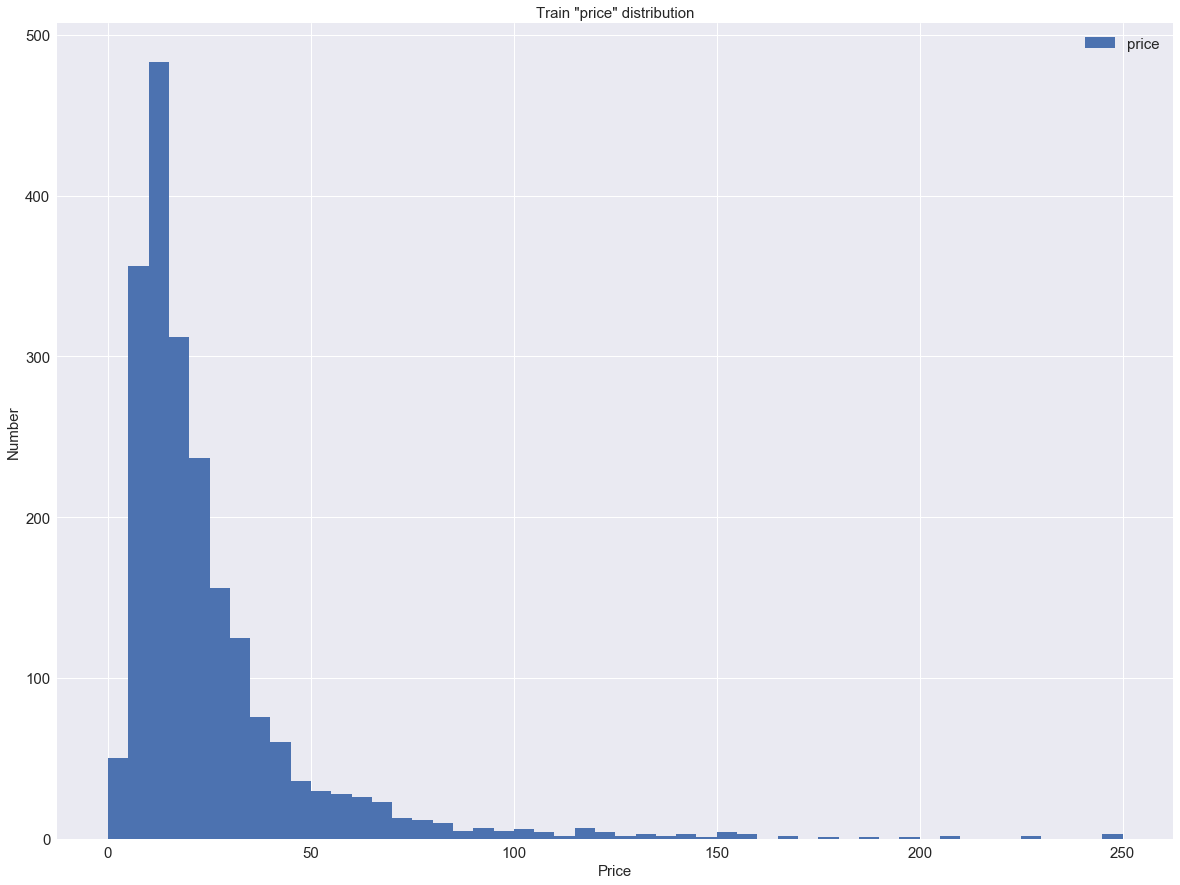

In [74]:
import matplotlib.pyplot as plt
# Price distribution
plt.figure(figsize=(20, 15))
plt.hist(df['price'], bins=50, range=[0,250], label='price')
plt.title('Train "price" distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

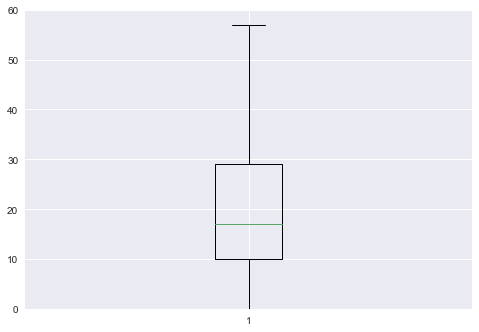

In [75]:
#plt.figure(figsize=(50, 20))
plt.boxplot(df['price'])
plt.ylim(0, 60)
plt.show()

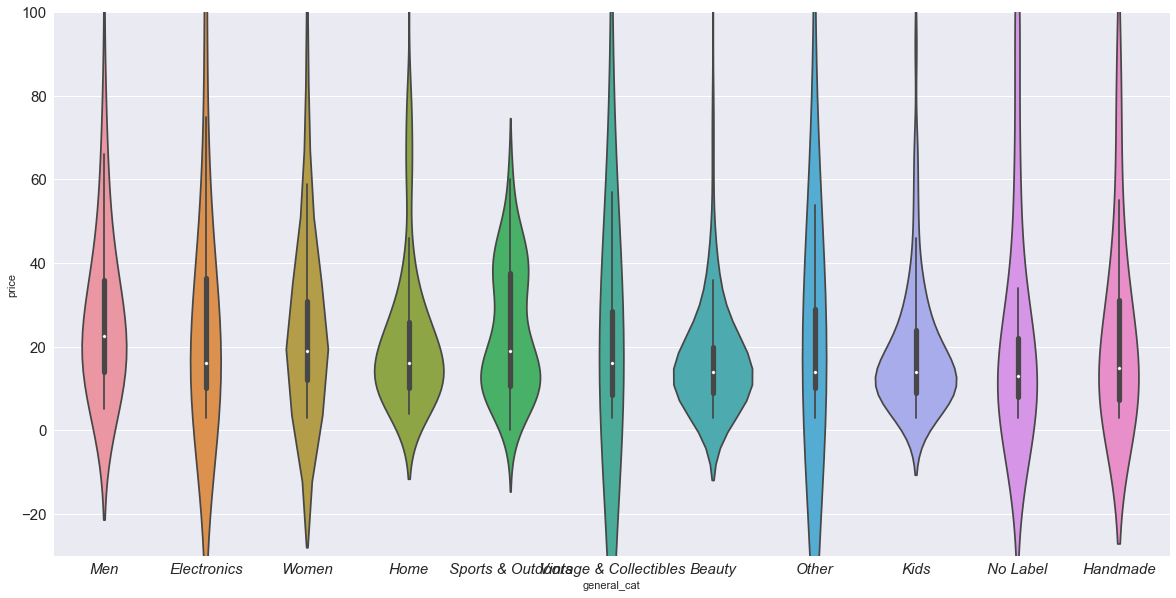

In [76]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.violinplot(x='general_cat',y='price',data=df)
plt.ylim(-30, 100)
#plt.xlim(0,13)
plt.xticks(fontsize=15,style='oblique')
plt.yticks(fontsize=15)
plt.show()

In [77]:
print(" vectorising description")
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 2),
    max_features=2000)
word_vectorizer.fit(df['item_description'])
train_word_features = word_vectorizer.transform(df['item_description'])
itemDesMatrix = hstack([train_word_features], format='csr')
#print(train_word_features)
des_array = train_word_features.toarray()
#print(des_array)
itemDesMatrix = pd.DataFrame(des_array, columns=word_vectorizer.get_feature_names())
print(itemDesMatrix.head(5))
print("done")

 vectorising description
     0   00    1  1 2  1 3  1 4  1 5  1 pair  1 rm  1 x   ...     yellow  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0   0.0  0.0   ...        0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0   0.0  0.0   ...        0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0   0.0  0.0   ...        0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0   0.0  0.0   ...        0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0   0.0  0.0   ...        0.0   

   yeti  york  zara  zebra  zip  zip hoodie  zipper  zipper pocket  zippers  
0   0.0   0.0   0.0    0.0  0.0         0.0     0.0            0.0      0.0  
1   0.0   0.0   0.0    0.0  0.0         0.0     0.0            0.0      0.0  
2   0.0   0.0   0.0    0.0  0.0         0.0     0.0            0.0      0.0  
3   0.0   0.0   0.0    0.0  0.0         0.0     0.0            0.0      0.0  
4   0.0   0.0   0.0    0.0  0.0         0.0     0.0            0.0      0.0  

[5 rows x 2000 columns]
done


In [78]:
#joining description dataframe with training dataframe
df = df.join(itemDesMatrix, on='price', how='left', rsuffix='_right')
df

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,general_cat,sub_cat1,sub_cat2,...,yellow,yeti,york,zara,zebra,zip,zip hoodie,zipper,zipper pocket,zippers
0,0,MLB Cincinnati Reds T Shirt Size XL,3,no brand,10,1,No description yet,Men,Tops,T-shirts,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,52,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,AVA-VIV Blouse,1,Target,10,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Leather Horse Statues,1,no brand,35,1,target New with tags. Leather horses. Retail f...,Home,Home Décor,Home Décor Accents,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,24K GOLD plated rose,1,no brand,44,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,Bundled items requested for Ruie,3,no brand,59,0,"Banana republic bottoms, Candies skirt with ma...",Women,Other,Other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,Acacia pacific tides santorini top,3,Acacia Swimwear,64,0,Size small but straps slightly shortened to fi...,Women,Swimwear,Two-Piece,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,Girls cheer and tumbling bundle of 7,3,Soffe,6,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Apparel,Girls,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,Girls Nike Pro shorts,3,Nike,19,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Apparel,Girls,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,Porcelain clown doll checker pants VTG,3,no brand,8,0,I realized his pants are on backwards after th...,Vintage & Collectibles,Collectibles,Doll,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
df_train=df.copy()
df_train = df_train.drop('train_id', axis=1)
df_train = df_train.drop('item_description', axis=1)
train_price=df_train.price
df_train.drop('price', axis=1)
df_train_price=df['price']
df_train=df_train.drop('price', axis=1)
df_train = df_train.join(df_train_price)
df_train.head(5)

,name,item_condition_id,brand_name,shipping,general_cat,sub_cat1,sub_cat2,0,00,1,...,yeti,york,zara,zebra,zip,zip hoodie,zipper,zipper pocket,zippers,price
0,MLB Cincinnati Reds T Shirt Size XL,3,no brand,1,Men,Tops,T-shirts,0.461603,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
1,Razer BlackWidow Chroma Keyboard,3,Razer,0,Electronics,Computers & Tablets,Components & Parts,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52
2,AVA-VIV Blouse,1,Target,1,Women,Tops & Blouses,Blouse,0.461603,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,Leather Horse Statues,1,no brand,1,Home,Home Décor,Home Décor Accents,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
4,24K GOLD plated rose,1,no brand,0,Women,Jewelry,Necklaces,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44


In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit((df_train['name']))
df_train.name=le.transform(df_train['name']).round(0)
le.fit((df_train['brand_name']))
df_train.brand_name=le.transform(df_train['brand_name']).round(0)
le.fit((df_train['general_cat']))
df_train.general_cat=le.transform(df_train['general_cat']).round(0)
le.fit((df_train['sub_cat1']))
df_train.sub_cat1=le.transform(df_train['sub_cat1']).round(0)
le.fit((df_train['sub_cat2']))
df_train.sub_cat2=le.transform(df_train['sub_cat2']).round(0)
scaler = preprocessing.StandardScaler().fit(df_train[['name', 'brand_name', 'general_cat', 'sub_cat1', 'sub_cat2']])
scaler.mean_
scaler.scale_
New_scaled =  scaler.transform(df_train[['name', 'brand_name', 'general_cat', 'sub_cat1', 'sub_cat2']]).round(4)

In [81]:
df_train

,name,item_condition_id,brand_name,shipping,general_cat,sub_cat1,sub_cat2,0,00,1,...,yeti,york,zara,zebra,zip,zip hoodie,zipper,zipper pocket,zippers,price
0,1118,3,339,1,5,80,261,0.461603,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
1,1568,3,259,0,1,24,79,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52
2,147,1,292,1,10,81,27,0.461603,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,985,1,339,1,3,44,146,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
4,76,1,339,0,10,47,199,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44
5,413,3,339,0,10,59,203,0.411474,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59
6,151,3,5,0,10,76,279,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64
7,727,3,280,1,8,2,130,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
8,725,3,229,0,8,2,130,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19
9,1503,3,339,0,9,23,97,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [82]:
X = np.array(df_train.iloc[:, 0:-1].values)
Y = np.array(df_train.iloc[:, -1].values)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
gbr = GradientBoostingRegressor(n_estimators=200,learning_rate =0.09,
                               min_samples_split= 2, max_depth=10,
                               max_features=20, loss= 'huber')
#gbr = LogisticRegression(solver='sag')
gbr = gbr.fit(X_train, Y_train)
predictions=gbr.predict(X_test)
predInt=[]
for prediction in predictions:
    if prediction<0:
        prediction=0
    predInt.append(int(prediction))
predIntNP=np.array(predInt)
def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y0), 2)))
print(rmsle(Y_test, predIntNP))


0.293219682117
